In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
%matplotlib inline

In [96]:
df = pd.read_csv('balance.txt')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [97]:
df.corr()['Balance'].sort_values()

Education   -0.008062
Age          0.001835
Cards        0.086456
Income       0.463656
Limit        0.861697
Rating       0.863625
Balance      1.000000
Name: Balance, dtype: float64

In [98]:
y = df.Balance
y.head()

0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [99]:
X = df.drop(columns=['Balance'])
X = X.drop(columns=['Limit'])
X = X.drop(columns=['Income'])
X = X.drop(columns=['Married'])
X = X.drop(columns=['Ethnicity'])
X = X.drop(columns=['Gender'])
X = X.drop(columns=['Cards'])
X.head()

,Rating,Age,Education,Student
0,283,34,11,No
1,483,82,15,Yes
2,514,71,11,No
3,681,36,11,No
4,357,68,16,No


In [100]:
X = pd.get_dummies(X)
X.head()

,Rating,Age,Education,Student_No,Student_Yes
0,283,34,11,1,0
1,483,82,15,0,1
2,514,71,11,1,0
3,681,36,11,1,0
4,357,68,16,1,0


In [101]:
X = X.drop(columns=['Student_No'])
X.head()

,Rating,Age,Education,Student_Yes
0,283,34,11,0
1,483,82,15,1
2,514,71,11,0
3,681,36,11,0
4,357,68,16,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
X_train.shape, X_test.shape

((268, 4), (132, 4))

In [104]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     807.5
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          1.06e-146
Time:                        17:40:01   Log-Likelihood:                -1796.4
No. Observations:                 268   AIC:                             3601.
Df Residuals:                     264   BIC:                             3615.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating          2.5388      0.073     34.852      0.000       2.395       2.682
Age            -3.8174      0.606     -6.297      0.000      -5.011      -2.624
Education     -13.3397      2.693     -4.954      0.000     -18.642      -8.037
Student_Yes   375.7067     41.147      9.131      0.000     294.688     456.726
==============================================================================
Omnibus:                       10.420   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.601
Skew:                          -0.437   Prob(JB):                      0.00499
Kurtosis:                       3.430   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

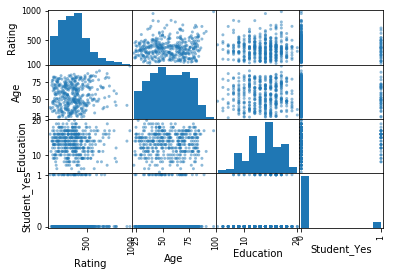

In [105]:
scatter_matrix(X);

In [106]:
y_hat = results.predict(X_test)

In [107]:
r2_score(y_test, y_hat)

0.7471322577153838